In [68]:
from sklearn.ensemble import RandomForestRegressor
import shap
import pandas as pd
from sklearn.model_selection import train_test_split
import pickle
from sklearn import metrics
import numpy as np
import matplotlib
import statsmodels.api as sm

In [69]:
data = pd.read_csv('regression_2001.csv')

In [70]:
x = data.iloc[:, 2: 17]
y = data.iloc[:, 1]

In [71]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=101)
regr = RandomForestRegressor(n_estimators=1000, random_state=0)
regr.fit(x_train, y_train.values.ravel())
predictions = regr.predict(x_test)
regr.predict(x.iloc[0:1,:])

array([1.52772454])

In [72]:
importances = list(regr.feature_importances_)
characteristics = x.columns
characteristics_importances = [(characteristic, round(importance, 2)) for characteristic, importance in zip(characteristics, importances)]
characteristics_importances = sorted(characteristics_importances, key = lambda x: x[1], reverse = True)
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in characteristics_importances];

Variable: Publictransit_01     Importance: 0.32
Variable: Age65_01             Importance: 0.1
Variable: Indigenous_01        Importance: 0.09
Variable: Crowdliving_01       Importance: 0.07
Variable: Female_01            Importance: 0.06
Variable: Renter_01            Importance: 0.06
Variable: Englishwell_01       Importance: 0.05
Variable: Separateh_01         Importance: 0.05
Variable: Nocar_01             Importance: 0.05
Variable: Bachelor_01          Importance: 0.03
Variable: Unemployed_01        Importance: 0.03
Variable: Lowincome_01         Importance: 0.03
Variable: MAP_01               Importance: 0.03
Variable: Mortgageless2000_01  Importance: 0.03


In [73]:
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, predictions))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, predictions))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('Accuracy:', regr.score(x_test,y_test))

Mean Absolute Error (MAE): 0.25152491431041935
Mean Squared Error (MSE): 0.12429834287066702
Root Mean Squared Error (RMSE): 0.3525597011438871
Accuracy: 0.5942481714612533


In [7]:
explainer = shap.Explainer(regr.predict, x_test)

In [8]:
shap_values = explainer(x_test)

Permutation explainer: 12047it [33:48:49, 10.10s/it]                                                                   


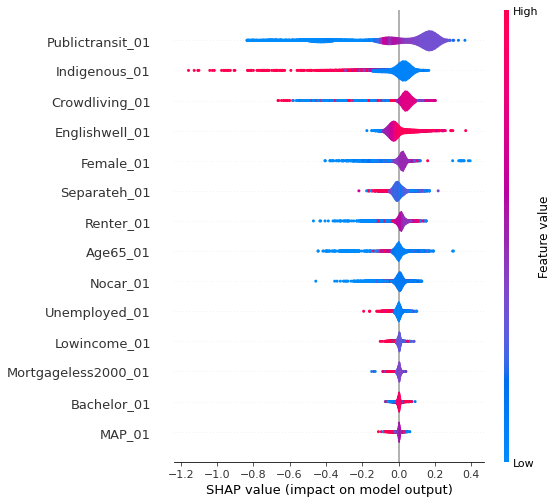

In [9]:
shap.summary_plot(shap_values, plot_type='violin', show=False)
import matplotlib.pyplot as plt
plt.savefig("ID_2001_MeanSHAP.jpg",dpi=400)

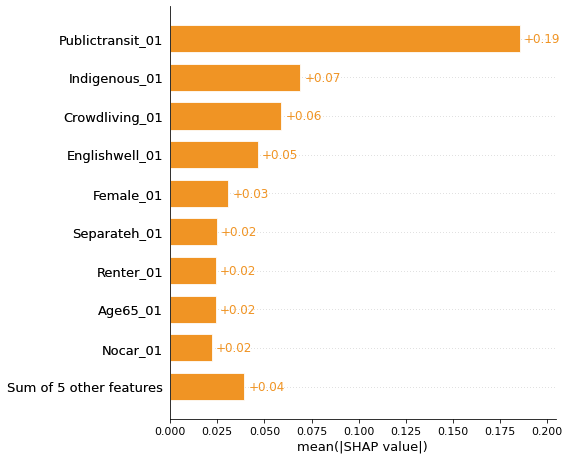

In [11]:
positive_color = "#f09424"
negative_color = "#92c5de"
default_pos_color = "#ff0051"
default_neg_color = "#008bfb"
# Plot bar plot
shap.plots.bar(shap_values, show = False)
# Change the colormap of the artists
for fc in plt.gcf().get_children():
    # Ignore last Rectangle
    for fcc in fc.get_children()[:-1]:
        if (isinstance(fcc, matplotlib.patches.Rectangle)):
            if (matplotlib.colors.to_hex(fcc.get_facecolor()) == default_pos_color):
                fcc.set_facecolor(positive_color)
            elif (matplotlib.colors.to_hex(fcc.get_facecolor()) == default_neg_color):
                fcc.set_color(negative_color)
        elif (isinstance(fcc, plt.Text)):
            if (matplotlib.colors.to_hex(fcc.get_color()) == default_pos_color):
                fcc.set_color(positive_color)
            elif (matplotlib.colors.to_hex(fcc.get_color()) == default_neg_color):
                fcc.set_color(negative_color)
plt.tight_layout()
plt.savefig("ID_2001_MeanSHAPbar.jpg",dpi=400)

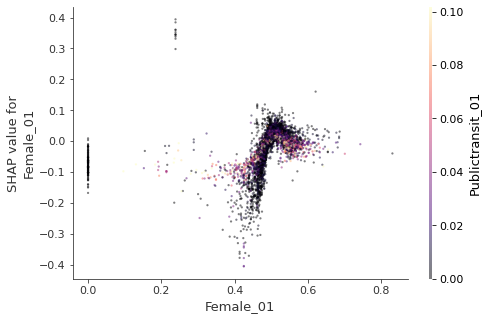

In [25]:
shap.dependence_plot('Female_01', shap_values.values, x_test, cmap=plt.get_cmap("magma"),alpha=0.5,dot_size=5,interaction_index='Publictransit_01')

In [20]:
features = x.columns.to_list()
features

['Female_01',
 'Age65_01',
 'Indigenous_01',
 'Bachelor_01',
 'Unemployed_01',
 'Englishwell_01',
 'Lowincome_01',
 'MAP_01',
 'Publictransit_01',
 'Separateh_01',
 'Renter_01',
 'Nocar_01',
 'Crowdliving_01',
 'Mortgageless2000_01']

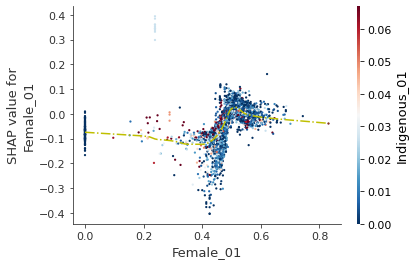

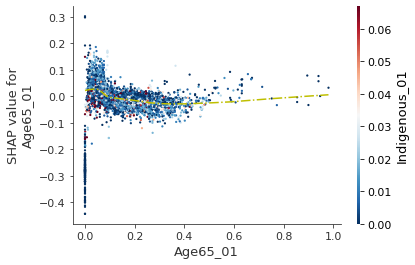

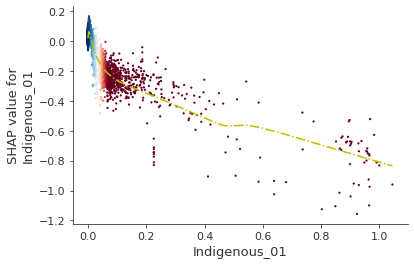

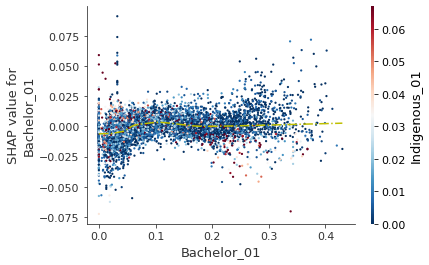

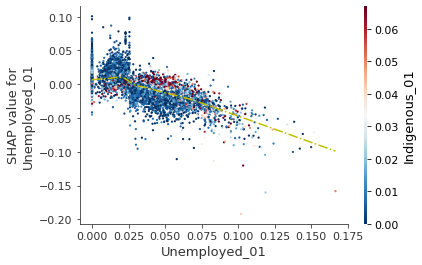

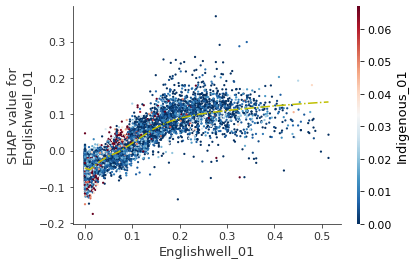

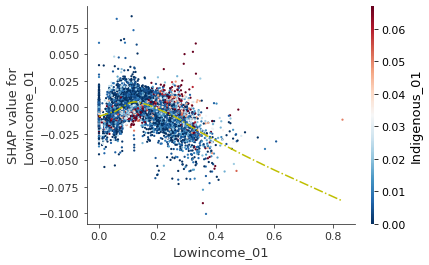

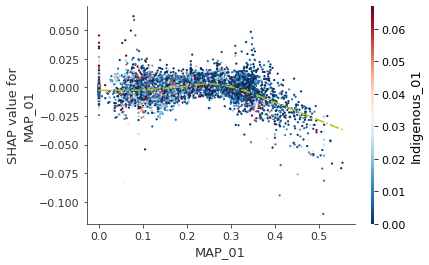

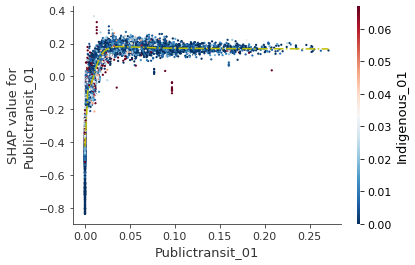

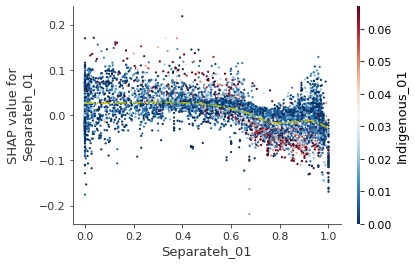

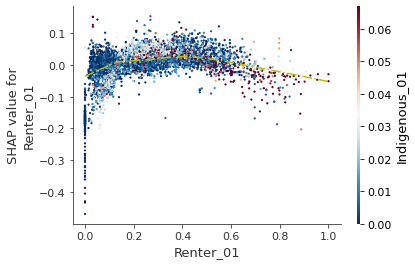

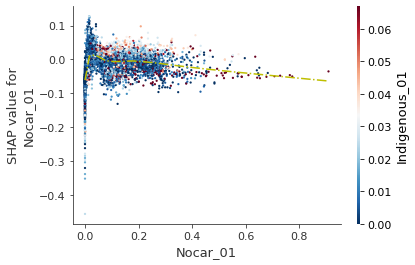

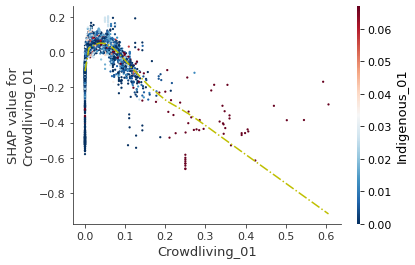

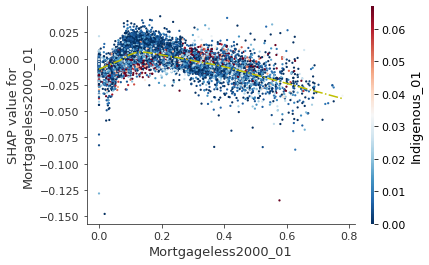

In [65]:
for a in features:
    idx = np.where(x_test.columns==a)[0][0]
    X = x_test.iloc[:,idx]
    y_sv = shap_values.values[:,idx]
    lowess = sm.nonparametric.lowess(y_sv, X, frac=.3)
    _,ax = plt.subplots()
    ax.plot(*list(zip(*lowess)), color="y", linestyle='-.',)
    shap.dependence_plot(a, shap_values.values, x_test, cmap=plt.get_cmap("RdBu_r"),dot_size=5,interaction_index='Indigenous_01',show=False,ax=ax)
    plt.savefig("ID_"+a+"RL.jpg",dpi=500)

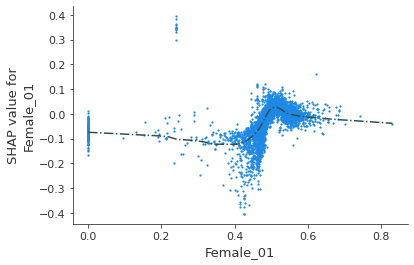

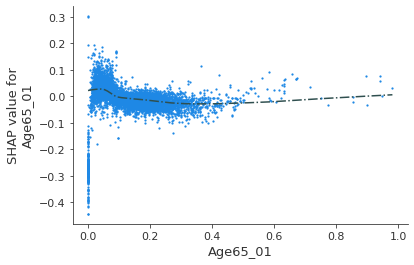

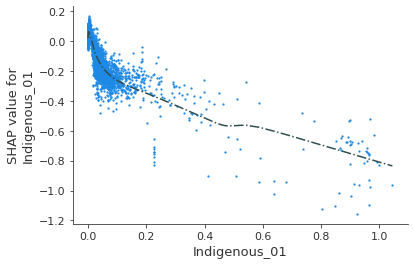

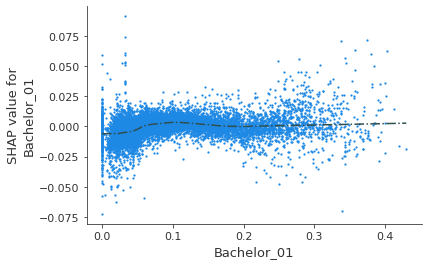

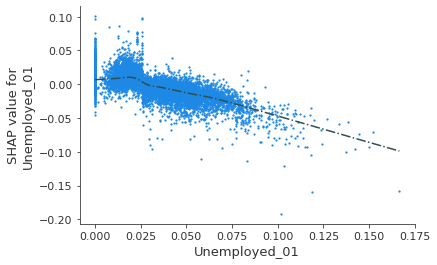

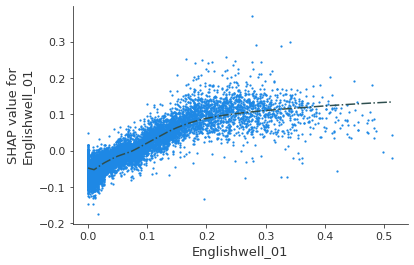

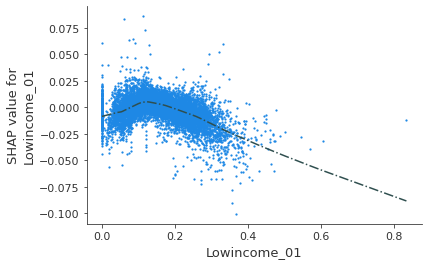

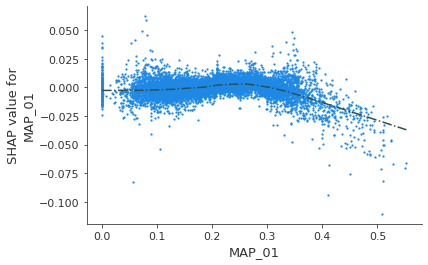

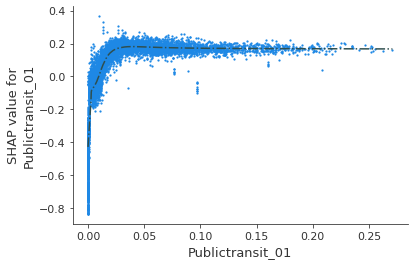

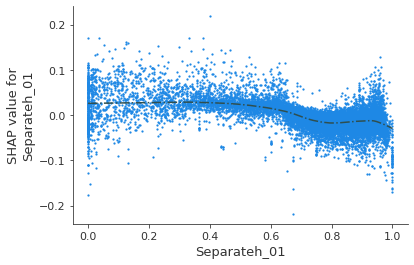

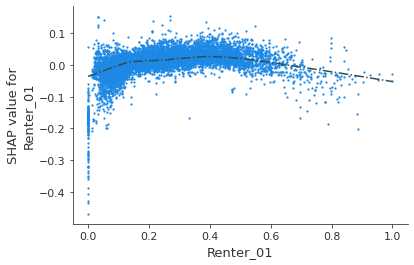

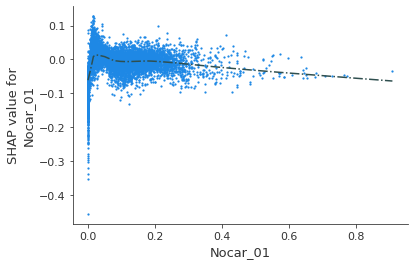

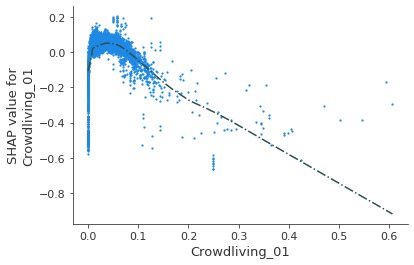

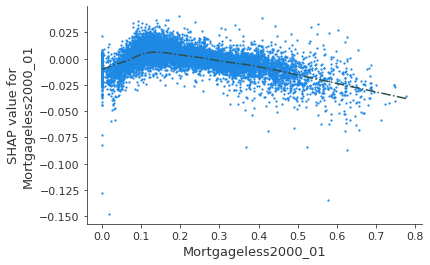

In [67]:
for a in features:
    idx = np.where(x_test.columns==a)[0][0]
    X = x_test.iloc[:,idx]
    y_sv = shap_values.values[:,idx]
    lowess = sm.nonparametric.lowess(y_sv, X, frac=.3)
    _,ax = plt.subplots()
    ax.plot(*list(zip(*lowess)), color="darkslategrey", linestyle='-.',)
    shap.dependence_plot(a, shap_values.values, x_test, cmap=plt.get_cmap("RdBu_r"),dot_size=5,interaction_index=None,show=False,ax=ax)
    plt.savefig("ID_"+a+"RL_none.jpg",dpi=500)

In [94]:
# save shap values
filename = 'shap_values2001.sav'
pickle.dump(shap_values, open(filename, 'wb'))

In [92]:
# save shap values
loaded_model = pickle.load(open(filename, 'rb'))